## Libraries

In [88]:
# Libraries
import re
import sys
import os
import glob
import webbrowser
import natsort
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Functions

In [68]:
# Directory
actual_directory = os.getcwd() + '/'  

python_releaseDates = {
    'Python 3.13.0a0': '2023-06-07',
    'Python 3.12.0b1': '2023-05-22',
    'Python 3.11.3': '2023-04-05',
    'Python 3.10.11': '2023-04-05',
    'Python 3.9.16': '2022-12-06',
    'Python 3.8.16': '2022-12-06',
    'Python 3.7.16': '2022-12-06',
    'Python 3.6.15': '2021-09-04',
    'Python 3.5.10': '2020-09-05',
    'Python 3.4.10': '2019-03-18',
    'Python 3.3.7': '2017-09-19',
    'Python 3.2.6': '2014-10-11',
    'Python 3.1.5': '2012-04-09',
    'Python 3.0.1': '2009-02-13',
    'Python 2.7.18': '2020-04-20',
    'Python 2.6.9': '2013-10-29',
    'Python 2.5.6': '2011-05-26',
}

cplusplus_releaseDates = {
    'g++-4.4 4.4.7': '2012-03-13',
    'g++-4.6 4.6.4': '2013-04-12',
    'g++-4.7 4.7.4': '2014-06-12',
    'g++-4.8 4.8.5': '2015-06-23',
    'g++-4.9 4.9.3': '2015-06-26',
    'g++-5 5.5.0': '2017-10-10',
    'g++-6 6.5.0': '2018-10-26',
    'g++-7 7.5.0': '2019-11-14',
    'g++-8 8.5.0': '2021-05-14',
    'g++-8 ': '2021-05-14',
    'g++-9 9.5.0': '2022-05-27',
    'g++-10 10.4.0': '2022-06-28',
    'g++-10 10.5.0': '2023-07-07',
    'g++-11 11.4.0': '2023-05-29',
    'g++-12 12.3.0': '2023-05-08',
    'g++-13 13.1.0': '2023-04-26',
}

java_releaseDates = {
    '1.8.0_362': '2023-04-18',
    '1.8.0_382': '2023-07-18',
    '9.0.4': '2018-01-16',
    '10.0.2': '2018-07-17',
    '11.0.19': '2020-10-20',
    '11.0.20': '2023-07-18',
    '11.0.20.1': '2023-08-22',
    '12.0.2': '2019-07-16',
    '13.0.2': '2020-01-14',
    '14.0.2': '2020-07-14',
    '15.0.2': '2021-01-19',
    '16.0.2': '2021-07-20',
    '17.0.7': '2023-04-18',
    '17.0.8': '2023-07-18',
    '17.0.8.1': '2023-08-22',
    '18.0.2-ea': '2022-07-19',
    '19.0.2': '2023-01-17',
    '20.0.2': '2023-07-18',
}

js_releaseDates = {
    '20.5.1': '2023-08-09',
    '19.9.0': '2023-04-10',
    '18.17.1': '2023-08-08',
    '17.9.1': '2022-06-01',
    '16.20.2': '2023-08-08',
    '15.14.0': '2021-04-06',
    '14.21.3': '2023-02-16',
    '13.14.0': '2020-04-29',
    '12.22.12': '2022-04-05',
    '11.15.0': '2019-04-30',
    '10.24.1': '2021-04-06',
    '9.11.2': '2018-06-12',
    '8.17.0': '2019-12-17',
    '7.10.1': '2017-07-11',
    '6.17.1': '2019-04-03',
    '5.12.0': '2016-06-23',
    '4.9.1': '2018-03-29',
    '3.3.1': '2015-09-15',
    '2.5.0': '2015-07-28',
    '1.8.4': '2015-07-09',
    '0.12.18': '2017-02-22',
    '0.10.48': '2016-10-18',
    '0.8.28': '2014-07-31'
}

# Function to get release date for a given Python version
def get_release_date(version):
    if language == 'python':
        return python_releaseDates.get(version, 'Unknown')
    elif language == 'c++':
        return cplusplus_releaseDates.get(version, 'Unknown')
    elif language == 'java':
        return java_releaseDates.get(version, 'Unknown')
    elif language == 'js':
        return js_releaseDates.get(version, 'Unknown')

# Function to convert "g", "m" or KiB to "byte"
def convert_g_to_byte(value):
    value_str = str(value)
    if value_str[:-1] == "":
        Byte_value = 0
    elif value_str[-1].lower() == 'g':
        g_value = float(value_str[:-1])
        Byte_value = g_value * 1024 * 1024 * 1024  # 1 giga = 1,000,000,000
    elif value_str[-1].lower() == 'm':
        m_value = float(value_str[:-1])
        Byte_value = m_value * 1024 * 1024 # 1 giga = 1,000,000
    elif value_str[-1].lower() == 'k':
        k_value = float(value_str[:-1])
        Byte_value = k_value * 1024 # 1 kilo = 1,000
    else:
        k_value = float(value_str)
        Byte_value = k_value * 1024 # 1 kilo = 1,000
    return int(Byte_value)

def convert_toUnit(column):
    column = column.apply(convert_g_to_byte)
    column = pd.to_numeric(column, errors='coerce')
    return column

# Define a function to remove units from a string
def remove_units(cell_value):
    # Use regular expressions to remove units
    cell_value = re.sub(r'[A-Za-z]+', '', str(cell_value))
    return cell_value
    
def Data_normalized(df, tool):
    df_data = df[['version', 'release_date', 'path', 'appplication']]
    if tool == "turbostat": 
        df_metric = df.loc[:, ~df.columns.isin(['version', 'release_date', 'path', 'appplication'])]
    elif tool == "top":
        df_metric = df[['virt', 'res', 'shr', 'percent_cpu', 'percent_mem',
                    'nTH', 'P', 'SWAP', 'CODE', 'DATA', 'nMaj',
                    'nDRT', 'USED']]

    transformer = MaxAbsScaler().fit(df_metric)
    scaled = transformer.transform(df_metric)

    df_norm = pd.DataFrame(scaled, columns=df_metric.columns)
    df = pd.concat([df_data,df_norm.reindex(df_data.index)], axis=1)
    return df

# Function to extract information in every file
def from_CSVfile(file, directory, tool):
     # Read CSV file
    df = pd.read_csv(file)
    if language == 'js': df['version'] = df['version'].str.replace('v', '')
    
    # New column 'release_date' as the second 
    df['release_date'] = df['version'].apply(get_release_date)
    df.insert(1, 'release_date', df.pop('release_date'))

    # Convert date into datetime
    df['release_date'] = pd.to_datetime(df['release_date'])

    # New column 'path' as the third
    df['path'] = directory
    df.insert(2, 'path', df.pop('path'))

    # Clean and remove the unnecessary rows
    df.replace(to_replace='-', value=0, inplace=True)

    # Apply the conversion function to the DataFrame column
    if tool == "top":
        df = df.dropna(subset=['command'])
        df['virt'] = convert_toUnit(df['virt'])
        df['res'] = convert_toUnit(df['res'])
        df['shr'] = convert_toUnit(df['shr'])
        df['CODE'] = convert_toUnit(df['CODE'])
        df['DATA'] = convert_toUnit(df['DATA'])
        df['SWAP'] = convert_toUnit(df['SWAP'])
        df['USED'] = convert_toUnit(df['USED'])
        df['nMin'] = convert_toUnit(df['nMin'])
        df['nMaj'] = convert_toUnit(df['nMaj'])

    # Changes in the 'version' column
    if language == 'python': df['version'] = df['version'].str.replace('Python ', '')
    if language == 'c++': df['version'] = df['version'].str.split().str[0]

    # if language == 'python':
    #     order  =  ['2.5.6', '2.7.18', '3.0.1',  '3.4.10', '3.5.10', '3.6.15', '3.7.16', '3.8.16', '3.9.16','3.10.11', '3.11.3', '3.12.0b1', '3.13.0a0']
    #     df['version'] = pd.Categorical(df.version, ordered=True, categories=order)

    #     df = df.sort_values('version')

    # with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    #     print(df)

    return df

# Extract all information from ALL files
def from_CSVfiles(tool, norm):

    all_df = pd.DataFrame()

    list_directories = next(os.walk(language))[1]
    list_directories.sort()

    for directory_name in list_directories:
        if directory_name != "waiting" and directory_name != "older" and directory_name != "test" and directory_name != "general_plots" and directory_name != "general_plots_v1" and directory_name != "mainPrograms_plots":
            
            path=language + '/' + directory_name + '/' + tool + '/'
            
            if tool == "top":

                df = pd.DataFrame()
                list_files = os.listdir(path)

                # Get list of all files only in the given directory
                list_files = natsort.natsorted(list_files)

                for file_name in list_files:
                    if file_name.startswith("temp_top_data_") and file_name.endswith('.csv'):
                        df_Top = from_CSVfile(path + file_name, directory_name, tool)
                        df = pd.concat([df, df_Top])

                # Split the your_column into minutes, seconds, and hundredths
                df[['minutes', 'seconds_hundredths']] = df['time'].str.split(':', expand=True)

                # Convert minutes, seconds, and hundredths to seconds
                df['time'] = pd.to_numeric(df['minutes']) * 60 + pd.to_numeric(df['seconds_hundredths'])

                df.to_csv(path + "top_data_allVersions.csv", index=False)
            elif tool == "turbostat":
                df = pd.DataFrame()
                list_files = os.listdir(path)

                # Get list of all files only in the given directory
                list_files = natsort.natsorted(list_files)

                for file_name in list_files:
                    if file_name.startswith("turbostat_performance_data") and file_name.endswith('.csv') and file_name != "turbostat_performance_data_allVersions.csv":
                        df_Turbo = from_CSVfile(path + file_name, directory_name, tool)
                        df = pd.concat([df, df_Turbo])
                df['Pkg+RAM_J'] = df['Pkg_J'] + df['RAM_J']
                df['Pkg_Watt'] = df['Pkg_J'] / df['time_elapsed']
                df['RAM_Watt'] = df['RAM_J'] / df['time_elapsed']
                df['Pkg+RAM_Watts'] = df['Pkg_Watt'] + df['RAM_Watt']
            elif tool == "perf": 
                # path = path + tool
                df = pd.DataFrame()
                list_files = os.listdir(path)

                # Get list of all files only in the given directory
                list_files = natsort.natsorted(list_files)
            
                for file_name in list_files:
                    if file_name.startswith("perf_performance_data") and file_name.endswith('.csv'):
                        df_Perf= from_CSVfile(path + file_name, directory_name, tool)
                        df = pd.concat([df, df_Perf])

                # Extract the units contained in the every measurement, for instance, the column 'time_elapsed'
                # contains values in msec; so this convert into secs and remove the unit "msec" to add it in the header
                parameters = ["time_elapsed","freq_cycles","cpu_clock","freq_cpu_cycles","task_clock","cpu_thermal_margin"]

                for parameter in parameters:
                    colname = df[parameter].str.extract(r'\s(.+)$').iloc[0, 0]
                    if parameter == "time_elapsed":
                        df[parameter] = df[parameter].str.replace(colname, '').astype(int)
                        df['time_elapsed'] = df['time_elapsed'] / 1000000000
                        df.rename(columns={parameter: f'{parameter}_sec'}, inplace=True)
                    else:
                        df[parameter] = df[parameter].str.replace(colname, '').astype(float)
                        df.rename(columns={parameter: f'{parameter}_{colname}'}, inplace=True)
                df = df.rename(columns={"IPC": "IPC_perf"})

                # df['TotalSlots'] = df['freq_cycles_GHz'] * 4 * 1000000000
                df['TotalSlots'] = df['cycles'] * 4
                df['FetchBubbles'] = df['TotalSlots'] * df['Frontend_Bound'] 
                df['SlotsRetired'] = df['TotalSlots'] * df['Retiring'] 
                # df['SlotsIssued+RecoveryBubbles'] = (df['TotalSlots'] * df['Bad_Speculation']) + df['SlotsRetired']
                df['SlotsIssued+RecoveryBubbles'] = df['TotalSlots'] * df['Bad_Speculation'] 
                df['SlotsBackend'] = df['TotalSlots'] * df['Backend_Bound'] 
                df.to_csv(path + "perf_data_allVersions_10times.csv", index=False)
            else:
                # df = from_CSVfile(path + '_data_allVersions.csv', directory_name, tool)
                # if norm: df = Data_normalized(df, tool)
                print("Error selecting the tool. Please check an appropriate too.")
            all_df = pd.concat([all_df, df])

    return all_df

# CREATING A GENERAL DF WITH ALL IMPORTANT PARAMETERS
def general_df(df_turbostat, df_perf, df_top):
    df1 = df_turbostat.groupby(["path","version","release_date"], sort=False)[['time_elapsed',
                        'Pkg_J','Cor_J','RAM_J','GFX_J', 'Avg_MHz', 'Busy%', 'IPC', 'IRQ', 'POLL', 'C1%','C1E%','C3%','C6%','C7s%','C8%',
                        'C9%','C10%','CPU%c1','CPU%c3','CPU%c6','CPU%c7','CoreTmp','PkgTmp','GFX%rc6','Totl%C0','Any%C0','GFX%C0','CPUGFX%']].median().reset_index()
    df2 = df_perf.groupby(["path","version","release_date"], sort=False)[['time_elapsed_sec','CPU_Utilization','Retiring','Frontend_Bound','Bad_Speculation','Backend_Bound',
                            'TotalSlots','FetchBubbles','SlotsRetired','SlotsIssued+RecoveryBubbles','SlotsBackend',
                            'CPI','ILP','IPC_perf','cycles','freq_cycles_GHz','instructions',
                            'Kernel_Utilization', 'L1D_Cache_Fill_BW', 'Turbo_Utilization', 'cycles',
                            'instructions', 'insn_per_cycle', 'cpu_clock_msec', 'no_cpus', 'cpu_cycles', 'freq_cpu_cycles_GHz',
                            'cpu_migrations','ref_cycles','bus_cycles','task_clock_msec','no_cpus_task_clock',
                            'cpu_thermal_margin_C','branches','branch_misses','mem_loads','mem_stores','page_faults','minor_faults','major_faults',
                            'cache_references','cache_misses','percent_cache_misses','L1_dcache_loads','L1_dcache_load_misses',
                            'LLC_loads','LLC_load_misses','L1_icache_load_misses','dTLB_loads',
                            'dTLB_load_misses','iTLB_loads','iTLB_load_misses']].median().reset_index()
    df3 = df_top.groupby(["path","version","release_date"], sort=False)[['time','virt','res','shr','percent_cpu','percent_mem','nTH','P',
                        'SWAP','CODE','DATA','nMaj','nDRT','USED']].median().reset_index()

    df_merged = pd.merge(df1, df2, on=["path","version","release_date"], how='left')
    df = pd.merge(df_merged, df3, on=["path","version","release_date"], how='left')


    path=language + '/'
    df.to_csv(path + "dataframe_General_medianValues.csv", index=False)

    return df


In [120]:
import warnings

# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

## Trends

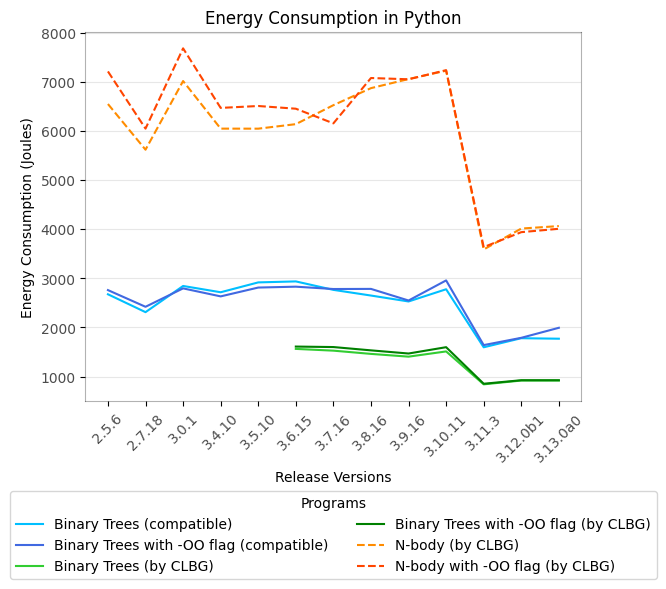

In [193]:
language = "python"
order =  ['2.5.6', '2.7.18', '3.0.1',  '3.4.10', '3.5.10', '3.6.15', '3.7.16', '3.8.16', '3.9.16','3.10.11', '3.11.3', '3.12.0b1', '3.13.0a0']

df = from_CSVfiles("turbostat", norm=False)
df = df.groupby(['version','path'], sort=False)[['Pkg+RAM_J']].median().reset_index()
df = df.rename(columns={"version":"Release version", "path": "Programs", "Pkg+RAM_J": "Energy Consumption (Joules)"})

list = ['Binary Trees (compatible)', 'Binary Trees with -OO flag (compatible)',
        'Binary Trees (by CLBG)', 'Binary Trees with -OO flag (by CLBG)',
        'N-body (by CLBG)', 'N-body with -OO flag (by CLBG)']
binaryTrees = ['deepskyblue','royalblue','limegreen','green']
nBody = ['darkorange','orangered']
i = 0
j = 0

for program in list:
    df1 = df.query('Programs == "' + program + '"')
    # df1['Release version'] = pd.Categorical(df1['Release version'], ordered=True, categories=order)
    # df1 = df1.sort_values('Release version')
    if "Binary Trees" in program:
        plt.plot(df1["Release version"],df1["Energy Consumption (Joules)"], label = program, ls = '-', color = binaryTrees[i])
        i = i + 1
    elif "N-body" in program:
        plt.plot(df1["Release version"],df1["Energy Consumption (Joules)"], label = program, ls ='--', color = nBody[j])
        j = j + 1
plt.legend(title = "Programs", loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=2)
plt.ylabel('Energy Consumption (Joules)')
plt.xlabel('Release Versions')
plt.xticks(rotation=45)
plt.grid(True, axis = 'y', alpha=.3)

plt.yticks(alpha=.7)
plt.xticks(rotation=45, alpha=.7)
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Energy Consumption in Python')
plt.savefig('python_energy.png', bbox_inches='tight')
plt.show()

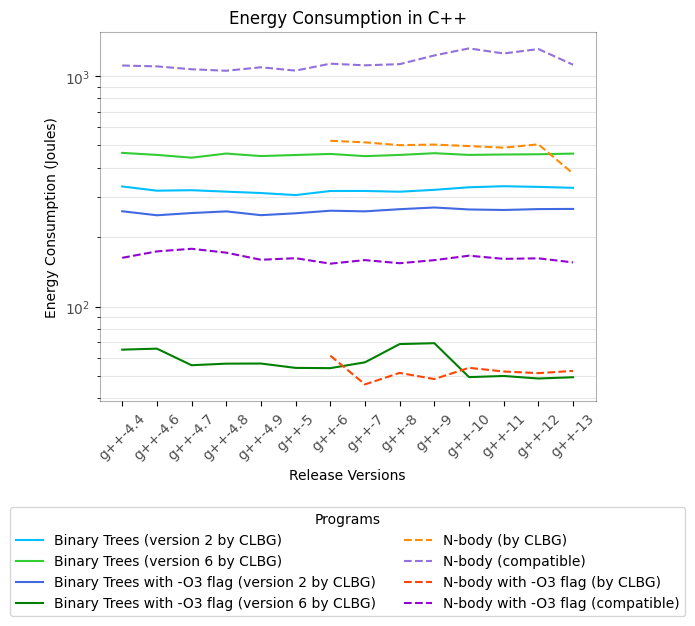

In [192]:
language = "c++"

df = from_CSVfiles("turbostat", norm=False)
df = df.groupby(['version','path'], sort=False)[['Pkg+RAM_J']].median().reset_index()
df = df.rename(columns={"version":"Release version", "path": "Programs", "Pkg+RAM_J": "Energy Consumption (Joules)"})

binaryTrees = ['deepskyblue','limegreen','royalblue','green']
nBody = ['darkorange','mediumpurple','orangered','darkviolet']
i = 0
j = 0

for program in df["Programs"].unique():
    df1 = df.query('Programs == "' + program + '"')
    # df1['Release version'] = pd.Categorical(df1['Release version'], ordered=True, categories=order)
    # df1 = df1.sort_values('Release version')
    if "Binary Trees" in program:
        plt.plot(df1["Release version"],df1["Energy Consumption (Joules)"], label = program, ls = '-', color = binaryTrees[i])
        i = i + 1
    elif "N-body" in program:
        plt.plot(df1["Release version"],df1["Energy Consumption (Joules)"], label = program, ls ='--', color = nBody[j])
        j = j + 1
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(title = "Programs", loc='lower center', bbox_to_anchor=(0.5, -0.6), ncol=2)
plt.ylabel('Energy Consumption (Joules)')
plt.xlabel('Release Versions')
plt.yscale("log")
plt.grid(True, which="both", axis='y', alpha=.3)
plt.title('Energy Consumption in C++')

plt.yticks(alpha=.7)
plt.xticks(rotation=45, alpha=.7)
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.savefig('c++_energy.png', bbox_inches='tight')
plt.show()

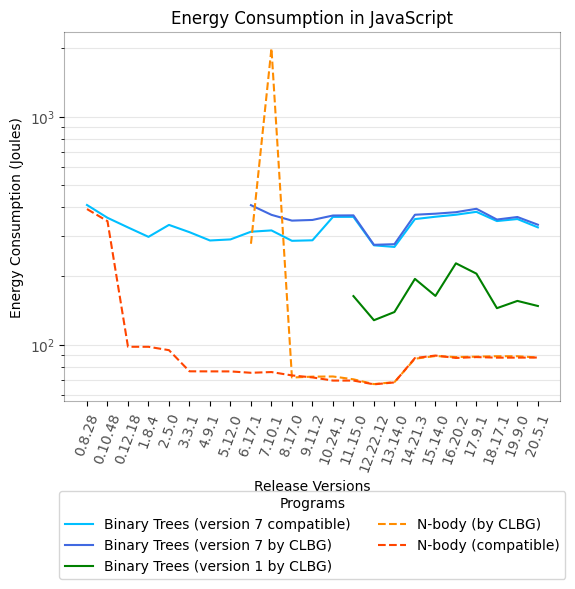

In [196]:
language = "js"

df = from_CSVfiles("turbostat", norm=False)
df = df.groupby(['version','path'], sort=False)[['Pkg+RAM_J']].median().reset_index()
df = df.rename(columns={"version":"Release version", "path": "Programs", "Pkg+RAM_J": "Energy Consumption (Joules)"})

list = ['Binary Trees (version 7 compatible)',
        'Binary Trees (version 7 by CLBG)',
        'Binary Trees (version 1 by CLBG)',
        'N-body (by CLBG)', 'N-body (compatible)']
binaryTrees = ['deepskyblue','royalblue','green']
nBody = ['darkorange','orangered']
i = 0
j = 0

for program in list:
    df1 = df.query('Programs == "' + program + '"')
    # df1['Release version'] = pd.Categorical(df1['Release version'], ordered=True, categories=order)
    # df1 = df1.sort_values('Release version')
    if "Binary Trees" in program:
        plt.plot(df1["Release version"],df1["Energy Consumption (Joules)"], label = program, ls = '-', color = binaryTrees[i])
        i = i + 1
    elif "N-body" in program:
        plt.plot(df1["Release version"],df1["Energy Consumption (Joules)"], label = program, ls ='--', color = nBody[j])
        j = j + 1
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(title = "Programs", loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=2)
plt.ylabel('Energy Consumption (Joules)')
plt.xlabel('Release Versions')
plt.yscale("log")
plt.grid(True, which="both", axis='y', alpha=.3)
plt.title('Energy Consumption in JavaScript')

plt.yticks(alpha=.7)
plt.xticks(rotation=70, alpha=.7)
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.savefig('js_energy.png', bbox_inches='tight')
plt.show()

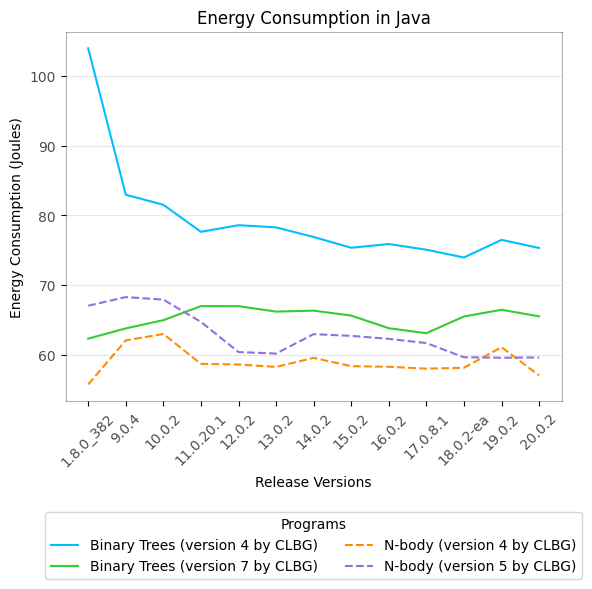

In [194]:
language = "java"

df = from_CSVfiles("turbostat", norm=False)
df = df.groupby(['version','path'], sort=False)[['Pkg+RAM_J']].median().reset_index()
df = df.rename(columns={"version":"Release version", "path": "Programs", "Pkg+RAM_J": "Energy Consumption (Joules)"})

binaryTrees = ['deepskyblue','limegreen','royalblue','green']
nBody = ['darkorange','mediumpurple','orangered','darkviolet']
i = 0
j = 0

for program in df["Programs"].unique():
    df1 = df.query('Programs == "' + program + '"')
    # df1['Release version'] = pd.Categorical(df1['Release version'], ordered=True, categories=order)
    # df1 = df1.sort_values('Release version')
    if "Binary Trees" in program:
        plt.plot(df1["Release version"],df1["Energy Consumption (Joules)"], label = program, ls = '-', color = binaryTrees[i])
        i = i + 1
    elif "N-body" in program:
        plt.plot(df1["Release version"],df1["Energy Consumption (Joules)"], label = program, ls ='--', color = nBody[j])
        j = j + 1
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(title = "Programs", loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=2)
plt.ylabel('Energy Consumption (Joules)')
plt.xlabel('Release Versions')
# plt.yscale("log")

plt.grid(True, which="both", axis='y', alpha=0.3)
plt.title('Energy Consumption in Java')

plt.yticks(alpha=.7)
plt.xticks(rotation=45, alpha=.7)
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.savefig('java_energy.png', bbox_inches='tight')
plt.show()

## Scatterplot

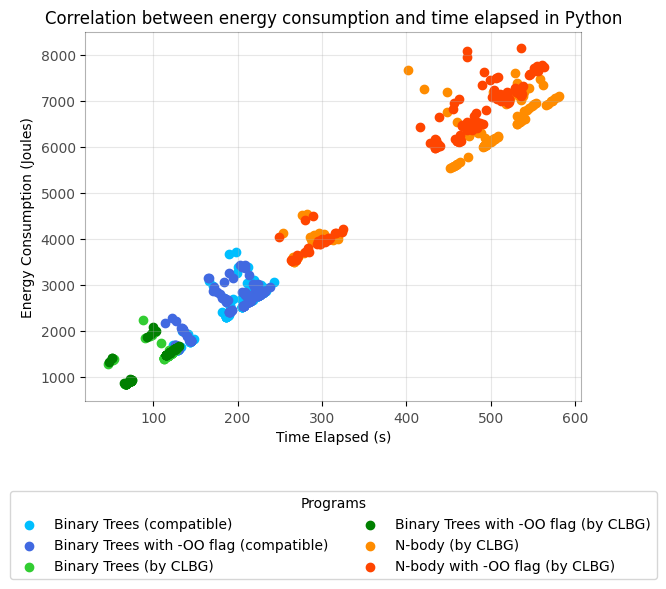

In [204]:
language = "python"
order =  ['2.5.6', '2.7.18', '3.0.1',  '3.4.10', '3.5.10', '3.6.15', '3.7.16', '3.8.16', '3.9.16','3.10.11', '3.11.3', '3.12.0b1', '3.13.0a0']

df = from_CSVfiles("turbostat", norm=False)
df = df.rename(columns={"version":"Release version",
                        "time_elapsed":"Time Elapsed (s)",
                        "path": "Programs",
                        "Pkg+RAM_J": "Energy Consumption (Joules)"})

list = ['Binary Trees (compatible)', 'Binary Trees with -OO flag (compatible)',
        'Binary Trees (by CLBG)', 'Binary Trees with -OO flag (by CLBG)',
        'N-body (by CLBG)', 'N-body with -OO flag (by CLBG)']
binaryTrees = ['deepskyblue','royalblue','limegreen','green']
nBody = ['darkorange','orangered']
i = 0
j = 0

for program in list:
    df1 = df.query('Programs == "' + program + '"')
#     # df1['Release version'] = pd.Categorical(df1['Release version'], ordered=True, categories=order)
#     # df1 = df1.sort_values('Release version')
    if "Binary Trees" in program:
        plt.scatter(df1["Time Elapsed (s)"], df1["Energy Consumption (Joules)"], label = program, color = binaryTrees[i])
        i = i + 1
    elif "N-body" in program:
        plt.scatter(df1["Time Elapsed (s)"], df1["Energy Consumption (Joules)"], label = program, color = nBody[j])
        j = j + 1
plt.legend(title = "Programs", loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=2)
plt.ylabel('Energy Consumption (Joules)')
plt.xlabel('Time Elapsed (s)')
plt.grid(True, axis = 'both', alpha=.3)

plt.yticks(alpha=.7)
plt.xticks(alpha=.7)
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Correlation between energy consumption and time elapsed in Python')
# plt.savefig('python_energy.png', bbox_inches='tight')
plt.show()

In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y)
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1, 1]')

for ax in axs.flat:
    ax.set(xlabel='Time Elapsed (s)', ylabel='Energy Consumption (Joules)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

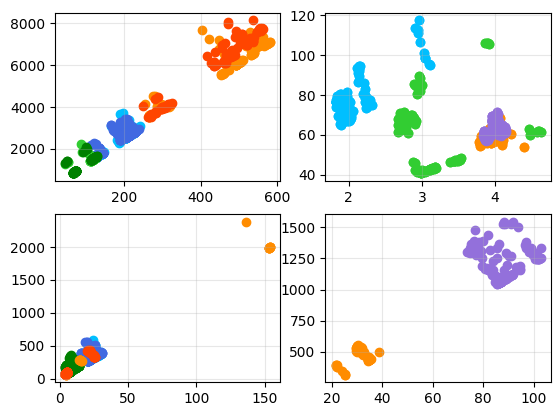

In [217]:
fig, axs = plt.subplots(2, 2)

language = "python"
order =  ['2.5.6', '2.7.18', '3.0.1',  '3.4.10', '3.5.10', '3.6.15', '3.7.16', '3.8.16', '3.9.16','3.10.11', '3.11.3', '3.12.0b1', '3.13.0a0']

df = from_CSVfiles("turbostat", norm=False)
df = df.rename(columns={"version":"Release version",
                        "time_elapsed":"Time Elapsed (s)",
                        "path": "Programs",
                        "Pkg+RAM_J": "Energy Consumption (Joules)"})

list = ['Binary Trees (compatible)', 'Binary Trees with -OO flag (compatible)',
        'Binary Trees (by CLBG)', 'Binary Trees with -OO flag (by CLBG)',
        'N-body (by CLBG)', 'N-body with -OO flag (by CLBG)']
binaryTrees = ['deepskyblue','royalblue','limegreen','green']
nBody = ['darkorange','orangered']
i = 0
j = 0

for program in list:
    df1 = df.query('Programs == "' + program + '"')
#     # df1['Release version'] = pd.Categorical(df1['Release version'], ordered=True, categories=order)
#     # df1 = df1.sort_values('Release version')
    if "Binary Trees" in program:
        axs[0, 0].scatter(df1["Time Elapsed (s)"], df1["Energy Consumption (Joules)"], label = program, color = binaryTrees[i])
        i = i + 1
    elif "N-body" in program:
        axs[0, 0].scatter(df1["Time Elapsed (s)"], df1["Energy Consumption (Joules)"], label = program, color = nBody[j])
        j = j + 1

# axs[0, 0].legend(title = "Programs", loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=2)
axs[0, 0].grid(True, axis = 'both', alpha=.3)

# axs[0, 0].yticks(alpha=.7)
# axs[0, 0].xticks(alpha=.7)
# axs[0, 0].gca().spines["top"].set_alpha(.3)
# axs[0, 0].gca().spines["bottom"].set_alpha(.3)
# axs[0, 0].gca().spines["right"].set_alpha(.3)
# axs[0, 0].gca().spines["left"].set_alpha(.3)


language = "java"

df = from_CSVfiles("turbostat", norm=False)
df = df.rename(columns={"version":"Release version",
                        "time_elapsed":"Time Elapsed (s)",
                        "path": "Programs",
                        "Pkg+RAM_J": "Energy Consumption (Joules)"})

binaryTrees = ['deepskyblue','limegreen','royalblue','green']
nBody = ['darkorange','mediumpurple','orangered','darkviolet']
i = 0
j = 0

for program in df["Programs"].unique():
    df1 = df.query('Programs == "' + program + '"')
#     # df1['Release version'] = pd.Categorical(df1['Release version'], ordered=True, categories=order)
#     # df1 = df1.sort_values('Release version')
    if "Binary Trees" in program:
        axs[0, 1].scatter(df1["Time Elapsed (s)"], df1["Energy Consumption (Joules)"], label = program, color = binaryTrees[i])
        i = i + 1
    elif "N-body" in program:
        axs[0, 1].scatter(df1["Time Elapsed (s)"], df1["Energy Consumption (Joules)"], label = program, color = nBody[j])
        j = j + 1

# axs[0, 0].legend(title = "Programs", loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=2)
axs[0, 1].grid(True, axis = 'both', alpha=.3)

language = "js"

df = from_CSVfiles("turbostat", norm=False)
df = df.rename(columns={"version":"Release version",
                        "time_elapsed":"Time Elapsed (s)",
                        "path": "Programs",
                        "Pkg+RAM_J": "Energy Consumption (Joules)"})

list = ['Binary Trees (version 7 compatible)',
        'Binary Trees (version 7 by CLBG)',
        'Binary Trees (version 1 by CLBG)',
        'N-body (by CLBG)', 'N-body (compatible)']
binaryTrees = ['deepskyblue','royalblue','green']
nBody = ['darkorange','orangered']
i = 0
j = 0

for program in list:
    df1 = df.query('Programs == "' + program + '"')
#     # df1['Release version'] = pd.Categorical(df1['Release version'], ordered=True, categories=order)
#     # df1 = df1.sort_values('Release version')
    if "Binary Trees" in program:
        axs[1, 0].scatter(df1["Time Elapsed (s)"], df1["Energy Consumption (Joules)"], label = program, color = binaryTrees[i])
        i = i + 1
    elif "N-body" in program:
        axs[1, 0].scatter(df1["Time Elapsed (s)"], df1["Energy Consumption (Joules)"], label = program, color = nBody[j])
        j = j + 1

# axs[0, 0].legend(title = "Programs", loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=2)
axs[1, 0].grid(True, axis = 'both', alpha=.3)


language = "java"

df = from_CSVfiles("turbostat", norm=False)
df = df.rename(columns={"version":"Release version",
                        "time_elapsed":"Time Elapsed (s)",
                        "path": "Programs",
                        "Pkg+RAM_J": "Energy Consumption (Joules)"})

binaryTrees = ['deepskyblue','limegreen','royalblue','green']
nBody = ['darkorange','mediumpurple','orangered','darkviolet']
i = 0
j = 0

for program in df["Programs"].unique():
    df1 = df.query('Programs == "' + program + '"')
#     # df1['Release version'] = pd.Categorical(df1['Release version'], ordered=True, categories=order)
#     # df1 = df1.sort_values('Release version')
    if "Binary Trees" in program:
        axs[0, 1].scatter(df1["Time Elapsed (s)"], df1["Energy Consumption (Joules)"], label = program, color = binaryTrees[i])
        i = i + 1
    elif "N-body" in program:
        axs[0, 1].scatter(df1["Time Elapsed (s)"], df1["Energy Consumption (Joules)"], label = program, color = nBody[j])
        j = j + 1

# axs[0, 0].legend(title = "Programs", loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=2)
axs[0, 1].grid(True, axis = 'both', alpha=.3)

language = "c++"

df = from_CSVfiles("turbostat", norm=False)
df = df.rename(columns={"version":"Release version",
                        "time_elapsed":"Time Elapsed (s)",
                        "path": "Programs",
                        "Pkg+RAM_J": "Energy Consumption (Joules)"})

binaryTrees = ['deepskyblue','limegreen','royalblue','green']
nBody = ['darkorange','mediumpurple','orangered','darkviolet']
i = 0
j = 0

for program in list:
    df1 = df.query('Programs == "' + program + '"')
#     # df1['Release version'] = pd.Categorical(df1['Release version'], ordered=True, categories=order)
#     # df1 = df1.sort_values('Release version')
    if "Binary Trees" in program:
        axs[1, 1].scatter(df1["Time Elapsed (s)"], df1["Energy Consumption (Joules)"], label = program, color = binaryTrees[i])
        i = i + 1
    elif "N-body" in program:
        axs[1, 1].scatter(df1["Time Elapsed (s)"], df1["Energy Consumption (Joules)"], label = program, color = nBody[j])
        j = j + 1

# axs[0, 0].legend(title = "Programs", loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=2)
axs[1, 1].grid(True, axis = 'both', alpha=.3)

# for ax in axs.flat:
#     ax.set(xlabel='Time Elapsed (s)', ylabel='Energy Consumption (J)')

# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()
